In [1]:
import pandas as pd
import filetype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from subprocess import check_output
from wordcloud import WordCloud,STOPWORDS
import time
import jieba
import sys
sys.setrecursionlimit(1000000)
from jieba import analyse
from __future__ import print_function
from snownlp import SnowNLP
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
movie=pd.read_csv('C:\\comments.csv',header=0, names = ['id','nick','content','score','startTime'])
movie=movie.fillna("")
movie['contentlen']=movie['content'].apply(lambda x:len(x))

In [3]:
movie.head()

,id,nick,content,score,startTime,contentlen
0,1047946860,MSt764477283,挺好看的，推荐推荐。,10,1545062340000,10
1,1047937581,路知道我在路上,还可以吧这次,6,1545059280000,6
2,1047943270,Rio3201,有教育意义，还不错,9,1545056880000,9
3,1047944213,rao715972358,影片很值得观看，很有意义,10,1545056880000,12
4,1047944182,Ck城市猎人,黄渤这种人电影看一部少一部。必须支持,10,1545056700000,18


In [4]:
def timestamp_datetime(x):
    dt=""
    try:
        value = time.localtime(float(x)/1000)
        dt = time.strftime('%Y-%m-%d %H:%M:%S', value)
    except:
        dt="0000000"
    return dt

movie['startTime1']=movie.startTime.apply(lambda x:timestamp_datetime(x))

In [5]:
def content_to_keyword(x):
    kw=""
    textrank = analyse.textrank
    keywords=textrank(x)
    for keyword in keywords:
        kw+=keyword+"/"
    return kw
movie['keyword']=movie.content.apply(lambda x:content_to_keyword(x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.196 seconds.
Prefix dict has been built succesfully.


In [6]:
def score_nlp(x):
    score_1=0
    s=SnowNLP(x)
    score_1=s.sentiments
#    print(score_1)
    return score_1

In [8]:
movie['score_nlp']=movie.content.apply(lambda x:score_nlp(x))

In [9]:
movie.head()

,id,nick,content,score,startTime,contentlen,startTime1,keyword,score_nlp
0,1047946860,MSt764477283,挺好看的，推荐推荐。,10,1545062340000,10,2018-12-17 23:59:00,推荐/好看/,0.937477
1,1047937581,路知道我在路上,还可以吧这次,6,1545059280000,6,2018-12-17 23:08:00,,0.625498
2,1047943270,Rio3201,有教育意义，还不错,9,1545056880000,9,2018-12-17 22:28:00,教育/意义/,0.973537
3,1047944213,rao715972358,影片很值得观看，很有意义,10,1545056880000,12,2018-12-17 22:28:00,观看/影片/值得/意义/,0.966977
4,1047944182,Ck城市猎人,黄渤这种人电影看一部少一部。必须支持,10,1545056700000,18,2018-12-17 22:25:00,黄渤/电影/,0.926116


In [21]:
sum_comments=movie[['content']]
sum_comments.to_csv("sum_comments.csv")

In [17]:
new_movie=movie[['content','score']]

In [18]:
new_movie.to_csv("new_movie.csv")

In [7]:
word_embedding=movie[['content']]
word_embedding.to_csv("word_embedding.csv")

In [22]:
movie.corr()

,id,score,startTime,contentlen,score_nlp
id,1.000000,0.006885,0.329024,-0.063167,-0.011266
score,0.006885,1.000000,0.047457,0.011394,0.439349
startTime,0.329024,0.047457,1.000000,-0.126065,-0.010698
contentlen,-0.063167,0.011394,-0.126065,1.000000,0.201684
score_nlp,-0.011266,0.439349,-0.010698,0.201684,1.000000


In [15]:
NoScoreMovie=movie[movie.score=='']
ScoreMovie=movie[movie.score!='']

In [17]:
X = ScoreMovie.iloc[:,[8]]
y = ScoreMovie['score']
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y=list(y)

In [18]:
lr = LinearRegression()
lr.fit(X_std, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
X0=NoScoreMovie.iloc[:,[8]]
X_std0= sc_x.fit_transform(X0)
y0=lr.predict(X_std0)
y0=np.round(y0)

In [20]:
movie.loc[movie.score=='','score']=y0

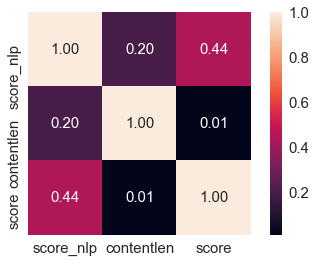

In [24]:
cols = ['score_nlp','contentlen','score']
cm = np.corrcoef(movie[cols].values.T) # 计算相关系数
sns.set(font_scale=1.5)

# 画相关系数矩阵的热点图
hm = sns.heatmap(cm,
        annot=True, 
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.tight_layout()

10    0.466472
8     0.151135
9     0.149019
7     0.073479
6     0.045459
Name: score, dtype: float64


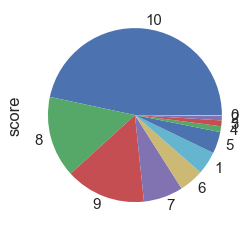

In [25]:
#评分占比
rate_score=movie["score"].value_counts()/movie["score"].count()
print(rate_score.head())
plt.gca().set_aspect('equal')
rate_score.head(15).plot.pie()
plt.gca().set_aspect('equal')

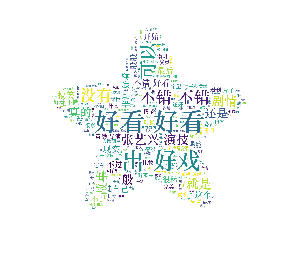

In [19]:
comments=[]
for comment in movie['content']:
    if comment!='':
        comments.append(comment)
comment_after_split=jieba.cut(str(comments),cut_all=False)
words=' '.join(comment_after_split)
stopwords=STOPWORDS.copy()
stopwords.add('电影')
stopwords.add('但是')
stopwords.add('有点')
stopwords.add('影片')
stopwords.add('电影')
stopwords.add('感觉')
stopwords.add('这部')
stopwords.add('觉得')
stopwords.add('一部')
stopwords.add('一个')
bg_image=plt.imread('E:\\star.jpg')
wc=WordCloud(width=1024,height=987,background_color='white',mask=bg_image,stopwords=stopwords,max_font_size=400,random_state=50,font_path='STZHONGS.TTF')
wc.generate_from_text(words)
plt.imshow(wc)
plt.axis('off')
plt.show
wc.to_file('wordcloud0.jpg')

In [26]:
def start_time(x):
    startTime2=str(x)
    startTime3=startTime2[:10]
    return startTime3

In [27]:
movie['start_time']=movie.startTime1.apply(lambda x:start_time(x))

In [28]:
new_movie=movie[["id","nick","content","score","contentlen","keyword","score_nlp","start_time"]]

In [29]:
new_movie.head()

,id,nick,content,score,contentlen,keyword,score_nlp,start_time
0,1047946860,MSt764477283,挺好看的，推荐推荐。,10,10,推荐/好看/,0.937477,2018-12-17
1,1047937581,路知道我在路上,还可以吧这次,6,6,,0.625498,2018-12-17
2,1047943270,Rio3201,有教育意义，还不错,9,9,教育/意义/,0.973537,2018-12-17
3,1047944213,rao715972358,影片很值得观看，很有意义,10,12,观看/影片/值得/意义/,0.966977,2018-12-17
4,1047944182,Ck城市猎人,黄渤这种人电影看一部少一部。必须支持,10,18,黄渤/电影/,0.926116,2018-12-17


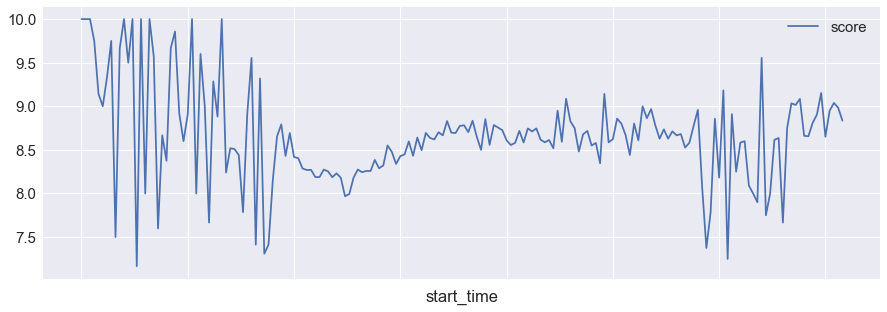

In [30]:
new_movie[["score","start_time"]].groupby("start_time").mean().plot(figsize=(15,5),kind="line")

In [21]:
def MaxMinNormalization(x):
    x = (int(x) - 0) / (10)# x = (x - min) / (max - min)
    return x
movie['score']=movie.score.apply(lambda x:MaxMinNormalization(x))
movie['ratio']=movie['score']/movie['score_nlp']

In [22]:
movie.head()

,id,nick,content,score,startTime,contentlen,startTime1,keyword,score_nlp,ratio
0,1047946860,MSt764477283,挺好看的，推荐推荐。,1.0,1545062340000,10,2018-12-17 23:59:00,推荐/好看/,0.937477,1.066693
1,1047937581,路知道我在路上,还可以吧这次,0.6,1545059280000,6,2018-12-17 23:08:00,,0.625498,0.959236
2,1047943270,Rio3201,有教育意义，还不错,0.9,1545056880000,9,2018-12-17 22:28:00,教育/意义/,0.973537,0.924465
3,1047944213,rao715972358,影片很值得观看，很有意义,1.0,1545056880000,12,2018-12-17 22:28:00,观看/影片/值得/意义/,0.966977,1.034151
4,1047944182,Ck城市猎人,黄渤这种人电影看一部少一部。必须支持,1.0,1545056700000,18,2018-12-17 22:25:00,黄渤/电影/,0.926116,1.079778


In [28]:
wrong_Movie=movie[movie.ratio>5]#|movie.ratio<0.9
wrong_Movie.head()

,id,nick,content,score,startTime,contentlen,startTime1,keyword,score_nlp,ratio
5,1047931589,睡美熊wt,张艺兴，差点没认出他来,0.9,1545056580000,11,2018-12-17 22:23:00,认出/差点/,0.160609,5.603675
8,1047936100,美女o请你看电影,发的干活吧不回家,1.0,1545053400000,8,2018-12-17 21:30:00,,0.186794,5.353499
24,1047906663,cxT290563230,男神的影片，支持一次吧，说实话，觉得有点低于期望值,0.7,1545039300000,25,2018-12-17 17:35:00,觉得/男神/期望值/支持/有点/影片/低于/,0.024580,28.478863
39,1047900227,小菜主题私人订制,黄渤太逗了 好看,1.0,1545025320000,9,2018-12-17 13:42:00,,0.155487,6.431400
84,1047802736,曾相识的人,很好看，太逗太逗,0.9,1544950380000,8,2018-12-16 16:53:00,,0.095171,9.456685


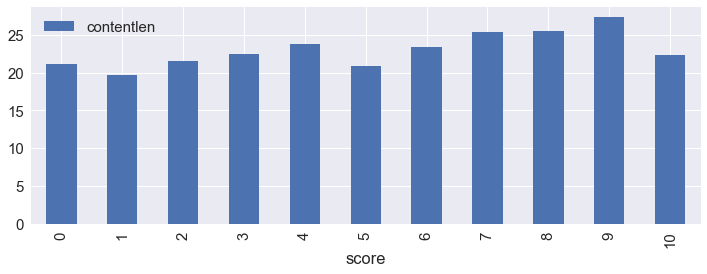

In [32]:
new_movie[["contentlen","score"]].groupby("score").mean().plot(figsize=(12,4),kind="bar")

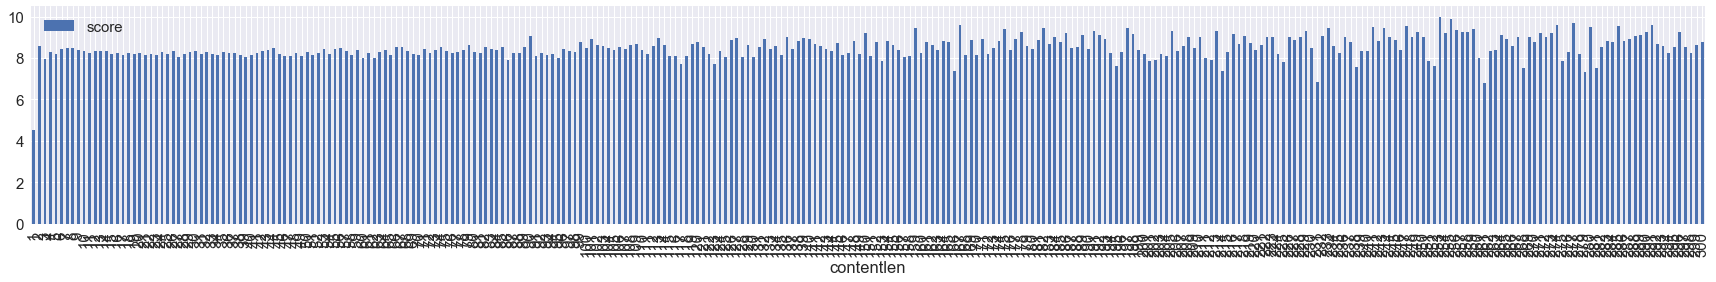

In [45]:
new_movie[["contentlen","score"]].groupby("contentlen").mean().plot(figsize=(30,4),kind="bar")